<a href="https://colab.research.google.com/github/BhargavAniketh2626/MachineLearning/blob/main/Machine_Learning_Skilling_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Decision Tree

##Importing LIbraries

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report

In [3]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [7]:
df = pd.read_csv("https://raw.githubusercontent.com/rolandmueller/titanic/main/titanic3.csv")
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [8]:
df = df.drop(columns=['name', 'ticket', 'cabin', 'embarked', 'boat', 'home.dest', 'body'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   sex       1309 non-null   object 
 3   age       1046 non-null   float64
 4   sibsp     1309 non-null   int64  
 5   parch     1309 non-null   int64  
 6   fare      1308 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 71.7+ KB


In [10]:
df.isna().sum()

pclass        0
survived      0
sex           0
age         263
sibsp         0
parch         0
fare          1
dtype: int64

In [12]:
from sklearn.impute import SimpleImputer
im = SimpleImputer(strategy='mean')
im.fit(df[['age', 'fare']])

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='mean', verbose=0)

In [13]:
df[['age', 'fare']] = im.transform(df[['age', 'fare']])

In [14]:
df.isna().sum()

pclass      0
survived    0
sex         0
age         0
sibsp       0
parch       0
fare        0
dtype: int64

In [16]:
df = pd.get_dummies(df, drop_first=True)
df

,pclass,survived,age,sibsp,parch,fare,sex_male
0,1,1,29.000000,0,0,211.3375,0
1,1,1,0.916700,1,2,151.5500,1
2,1,0,2.000000,1,2,151.5500,0
3,1,0,30.000000,1,2,151.5500,1
4,1,0,25.000000,1,2,151.5500,0
...,...,...,...,...,...,...,...
1304,3,0,14.500000,1,0,14.4542,0
1305,3,0,29.881135,1,0,14.4542,0
1306,3,0,26.500000,0,0,7.2250,1
1307,3,0,27.000000,0,0,7.2250,1


In [18]:
X = df.drop(columns="survived")
y = df['survived']

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [20]:
from sklearn.dummy import DummyClassifier

In [22]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)

DummyClassifier(constant=None, random_state=None, strategy='most_frequent')

In [23]:
y_pred = dummy_clf.predict(X_test)

In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names = ['dead', 'survived']))

              precision    recall  f1-score   support

        dead       0.56      1.00      0.72        73
    survived       0.00      0.00      0.00        58

    accuracy                           0.56       131
   macro avg       0.28      0.50      0.36       131
weighted avg       0.31      0.56      0.40       131



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [33]:
from sklearn import tree
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_5 <= 0.50
|   |--- feature_0 <= 2.50
|   |   |--- feature_4 <= 26.12
|   |   |   |--- feature_1 <= 56.00
|   |   |   |   |--- feature_2 <= 0.50
|   |   |   |   |   |--- feature_3 <= 0.50
|   |   |   |   |   |   |--- feature_4 <= 12.82
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_4 >  12.82
|   |   |   |   |   |   |   |--- feature_1 <= 39.00
|   |   |   |   |   |   |   |   |--- feature_1 <= 37.00
|   |   |   |   |   |   |   |   |   |--- feature_1 <= 30.50
|   |   |   |   |   |   |   |   |   |   |--- feature_1 <= 20.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |   |--- feature_1 >  20.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |--- feature_1 >  30.50
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- feature_1 >  37.00
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |  

In [51]:
df.corr()

,pclass,survived,age,sibsp,parch,fare,sex_male
pclass,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558477,0.124617
survived,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244208,-0.528693
age,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171521,0.057398
sibsp,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160224,-0.109609
parch,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221522,-0.213125
fare,-0.558477,0.244208,0.171521,0.160224,0.221522,1.000000,-0.185484
sex_male,0.124617,-0.528693,0.057398,-0.109609,-0.213125,-0.185484,1.000000


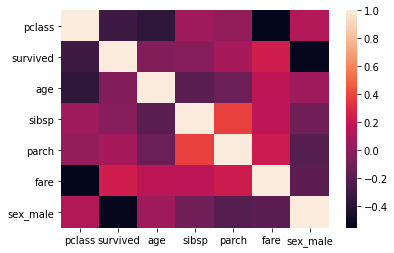

In [50]:
sns.heatmap(df.corr());

In [54]:
from sklearn import metrics
accuracy=metrics.accuracy_score(y_test,y_pred)
accuracy_percentage=100*accuracy
accuracy_percentage

75.57251908396947

In [55]:
gain_entropy = DecisionTreeClassifier( criterion = "entropy", random_state = 100, max_depth = 3, min_samples_leaf = 5) 

In [57]:
model=gain_entropy.fit(X_train,y_train)

In [60]:
z=X.columns
z

Index(['pclass', 'age', 'sibsp', 'parch', 'fare', 'sex_male'], dtype='object')

In [61]:
p=df.columns[4]
p

'parch'

In [62]:
from sklearn import tree
from six import StringIO
from IPython.display import Image
import pydotplus
import sklearn
dot_data=StringIO()
sklearn.tree.export_graphviz(gain_entropy,out_file=dot_data,filled=True,rounded=True,special_characters=True,feature_names=z,class_names=p)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())


In [63]:
graphs=tree.export_text(gain_entropy)
graphs

'|--- feature_5 <= 0.50\n|   |--- feature_0 <= 2.50\n|   |   |--- feature_4 <= 31.68\n|   |   |   |--- class: 1\n|   |   |--- feature_4 >  31.68\n|   |   |   |--- class: 1\n|   |--- feature_0 >  2.50\n|   |   |--- feature_4 <= 23.35\n|   |   |   |--- class: 1\n|   |   |--- feature_4 >  23.35\n|   |   |   |--- class: 0\n|--- feature_5 >  0.50\n|   |--- feature_1 <= 9.50\n|   |   |--- feature_2 <= 2.50\n|   |   |   |--- class: 1\n|   |   |--- feature_2 >  2.50\n|   |   |   |--- class: 0\n|   |--- feature_1 >  9.50\n|   |   |--- feature_0 <= 1.50\n|   |   |   |--- class: 0\n|   |   |--- feature_0 >  1.50\n|   |   |   |--- class: 0\n'

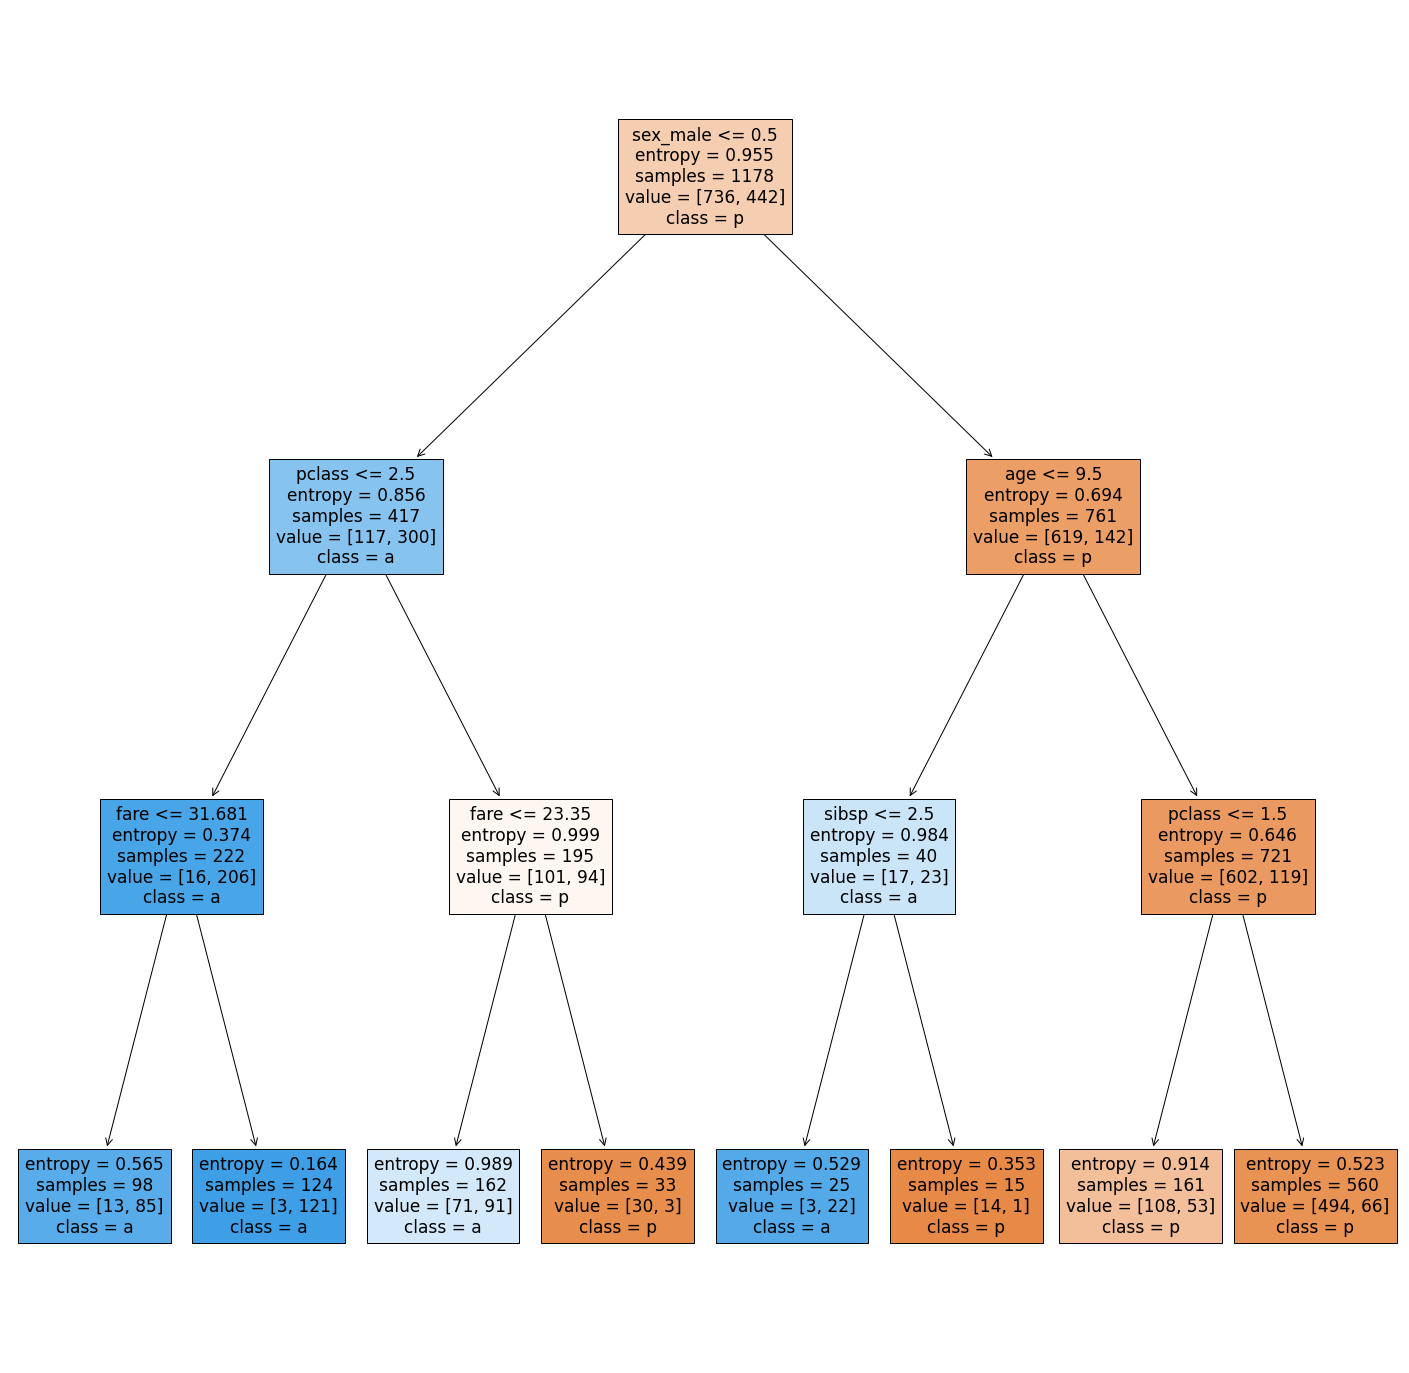

In [64]:
fig=plt.figure(figsize=(25,25))
_=tree.plot_tree(gain_entropy,feature_names=z,class_names=p,filled=True)

In [67]:
print("Confusion Matrix:",confusion_matrix(y_test,y_pred))

Confusion Matrix: [[59 14]
 [18 40]]


In [68]:
print("Accuracy:",accuracy_score(y_test,y_pred)*100)

Accuracy: 75.57251908396947


In [69]:
print("Report:",classification_report(y_test,y_pred))

Report:               precision    recall  f1-score   support

           0       0.77      0.81      0.79        73
           1       0.74      0.69      0.71        58

    accuracy                           0.76       131
   macro avg       0.75      0.75      0.75       131
weighted avg       0.75      0.76      0.75       131



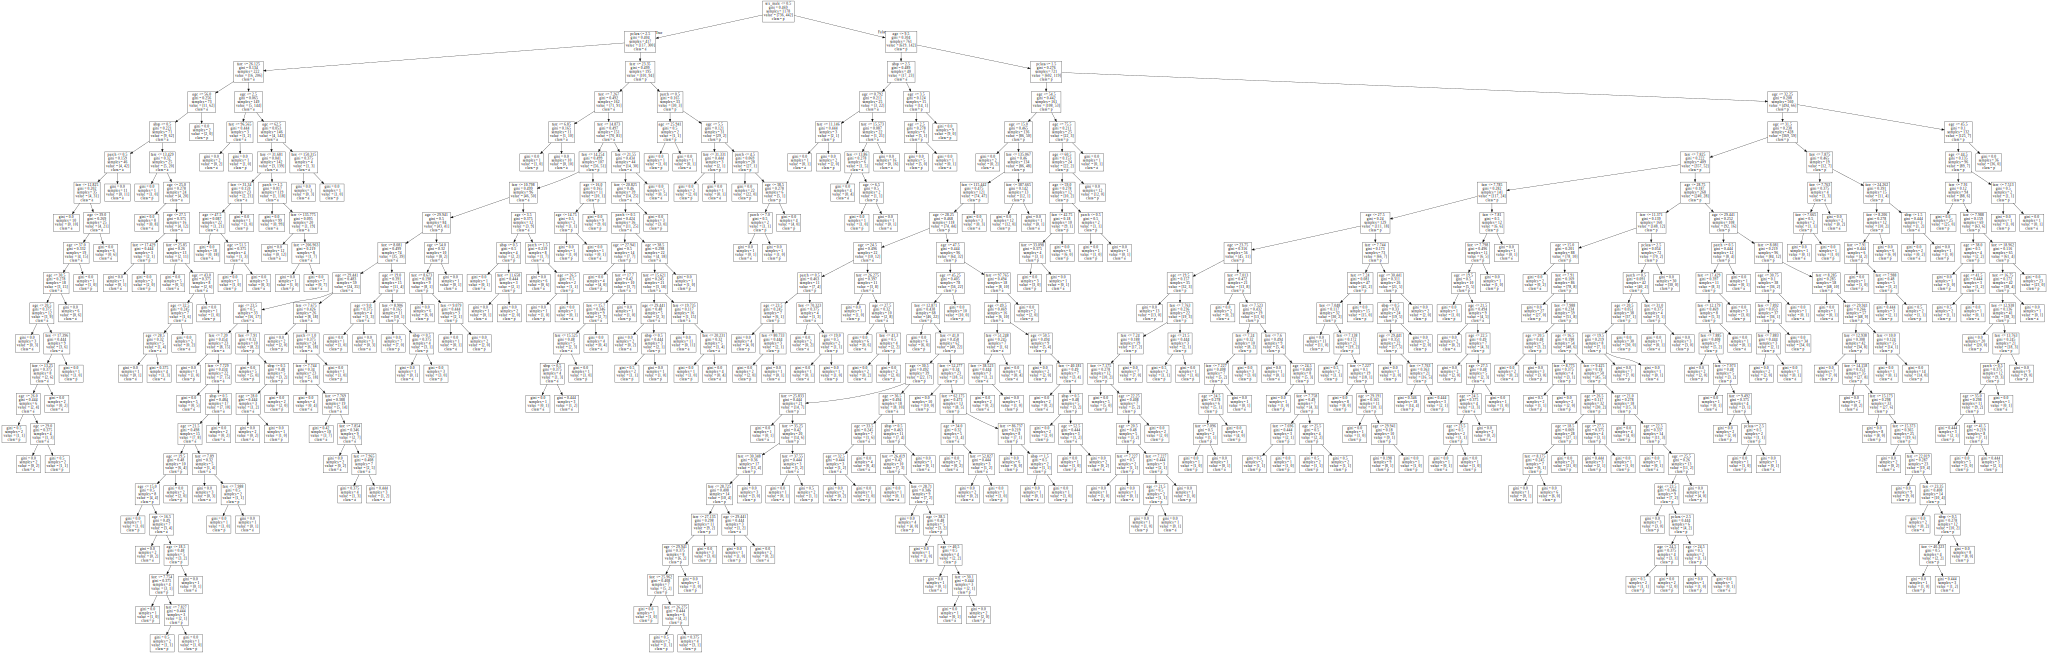

In [70]:
dot_data = tree.export_graphviz(clf,
                                out_file=None,
                                feature_names= z,
                                class_names= p)
graph = graphviz.Source(dot_data, format="png")
graph